In [220]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis**

We have 18 features out of which 15 features were extracted from dataset in the previous notebook, the 'label' feature is the ground truth while the remaining feature ('url, dga_type') is only there for reference and can will be removed during training of the model.

In [221]:
# loading out dataset from previous notebook

urldata = pd.read_csv("E:\\University\\Year 3\\Methods for detecting cyber attacks\\Project\\datasets\\DGA_Processed.csv")
urldata.drop(["Unnamed: 0"],axis=1,inplace=True)

urldata.head(10)

,label,dga_type,url,DNL,NoS,SLM,HVTLD,CTS,UR,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy
0,1,gozi,mortiscontrastatim.com,22,1,18.0,1,0,0.0,0,0.333333,0.000000,0.777778,0.500000,0.000000,3.058814
1,1,corebot,cvyh1po636avyrsxebwbkn7.ddns.net,32,1,23.0,1,0,0.0,1,0.166667,0.217391,0.210526,0.608696,0.130435,4.175736
2,0,alexa,plasticbags.sa.com,18,1,11.0,1,0,0.0,0,0.272727,0.000000,0.222222,0.545455,0.000000,3.095795
3,0,alexa,mzltrack.com,12,1,8.0,1,0,0.0,0,0.125000,0.000000,0.000000,0.625000,0.000000,3.000000
4,0,alexa,miss-slim.ru,12,1,9.0,1,0,0.0,0,0.250000,0.000000,0.600000,0.444444,0.000000,2.197160
5,1,ranbyus,txumyqrubwutbb.cc,17,1,14.0,1,0,0.0,0,0.214286,0.000000,0.333333,0.571429,0.000000,2.985228
6,0,alexa,myhostingpack.com,17,1,13.0,1,0,0.0,0,0.230769,0.000000,0.000000,0.615385,0.000000,3.700440
7,1,symmi,ixekrihagimau.ddns.net,22,1,13.0,1,0,0.0,0,0.538462,0.000000,0.200000,0.153846,0.000000,3.180833
8,1,emotet,rjyuosmhfnaedlyg.eu,19,1,16.0,1,0,0.0,0,0.250000,0.000000,0.066667,0.500000,0.000000,3.875000
9,1,dircrypt,djqrmauttlloabj.com,19,1,15.0,1,0,0.0,0,0.266667,0.000000,0.363636,0.600000,0.000000,3.373557


In [222]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674898 entries, 0 to 674897
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   label           674898 non-null  int64  
 1   dga_type        674898 non-null  object 
 2   url             674898 non-null  object 
 3   DNL             674898 non-null  int64  
 4   NoS             674898 non-null  int64  
 5   SLM             674898 non-null  float64
 6   HVTLD           674898 non-null  int64  
 7   CTS             674898 non-null  int64  
 8   UR              674898 non-null  float64
 9   contains_digit  674898 non-null  int64  
 10  vowel_ratio     673743 non-null  float64
 11  digit_ratio     674898 non-null  float64
 12  RRC             674898 non-null  float64
 13  RCC             674898 non-null  float64
 14  RCD             674898 non-null  float64
 15  Entropy         674898 non-null  float64
dtypes: float64(8), int64(6), object(2)
memory usage: 82.4+ M

In [223]:
for column in urldata.columns[urldata.isna().any()].tolist():
    percent_missing = urldata[column].isnull().sum() / len(urldata)
    print(f"Percentage of missing values in {column}: {percent_missing:.2%}")

Percentage of missing values in vowel_ratio: 0.17%


In [224]:
urldata['vowel_ratio'].fillna(0, inplace=True)

1    337500
0    337398
Name: label, dtype: int64


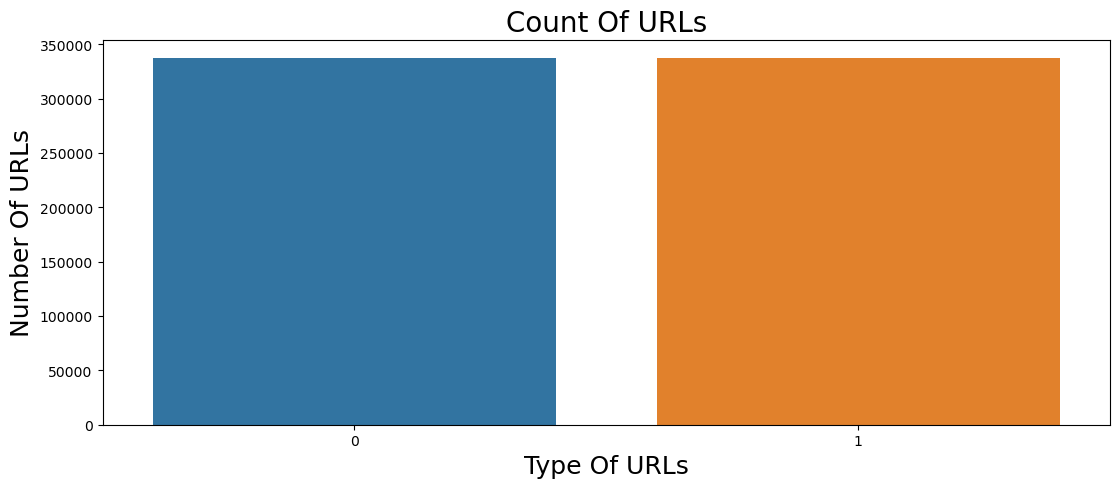

In [225]:
# Lets find how many malicious and non-malicious samples we have
i = urldata["label"].value_counts()
print(i)

plt.figure(figsize=(13,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

<AxesSubplot:>

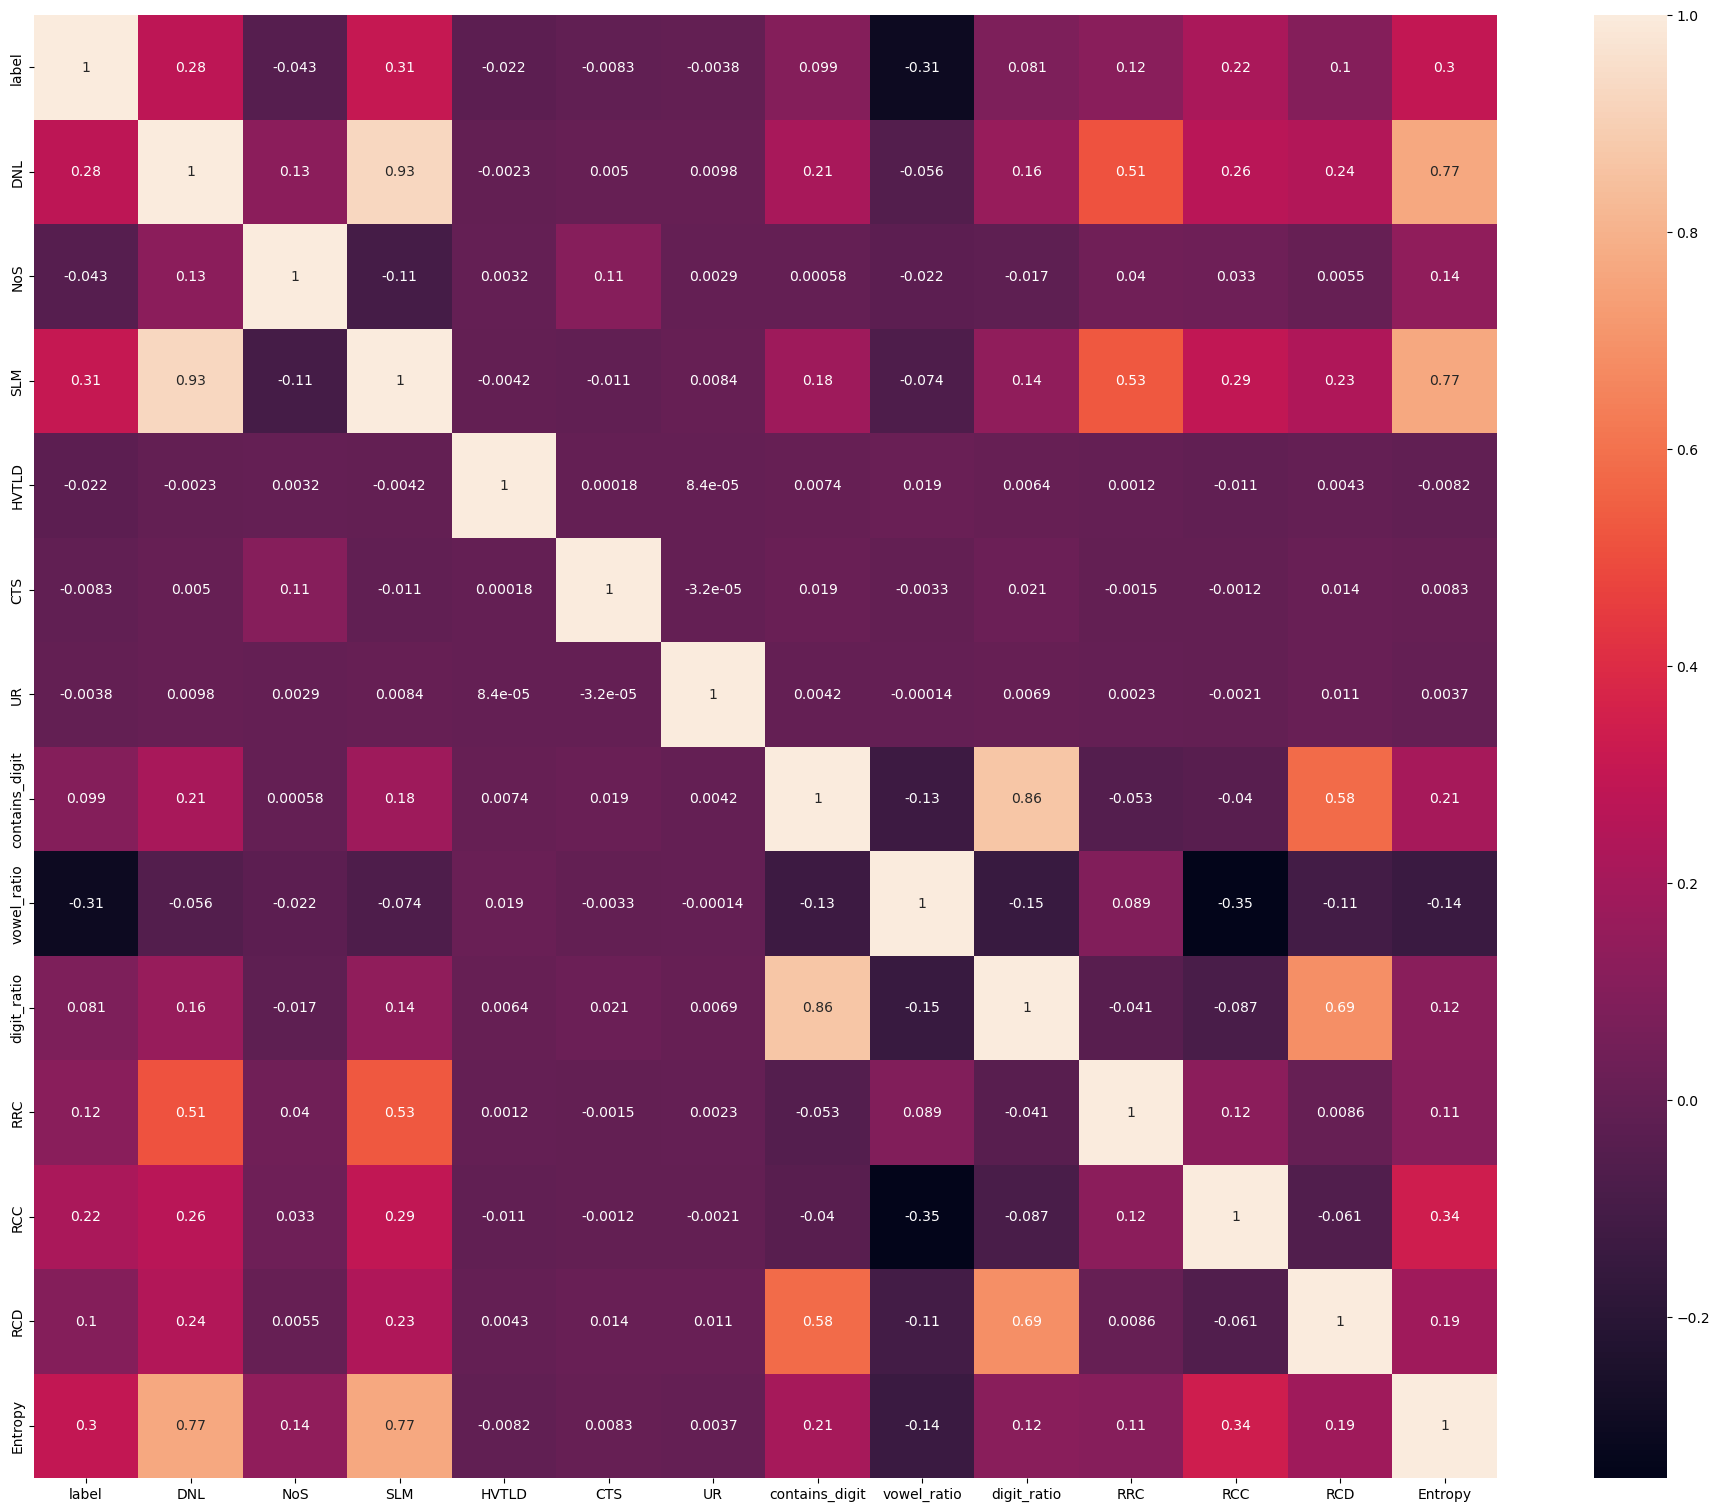

In [226]:
#Correlation Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

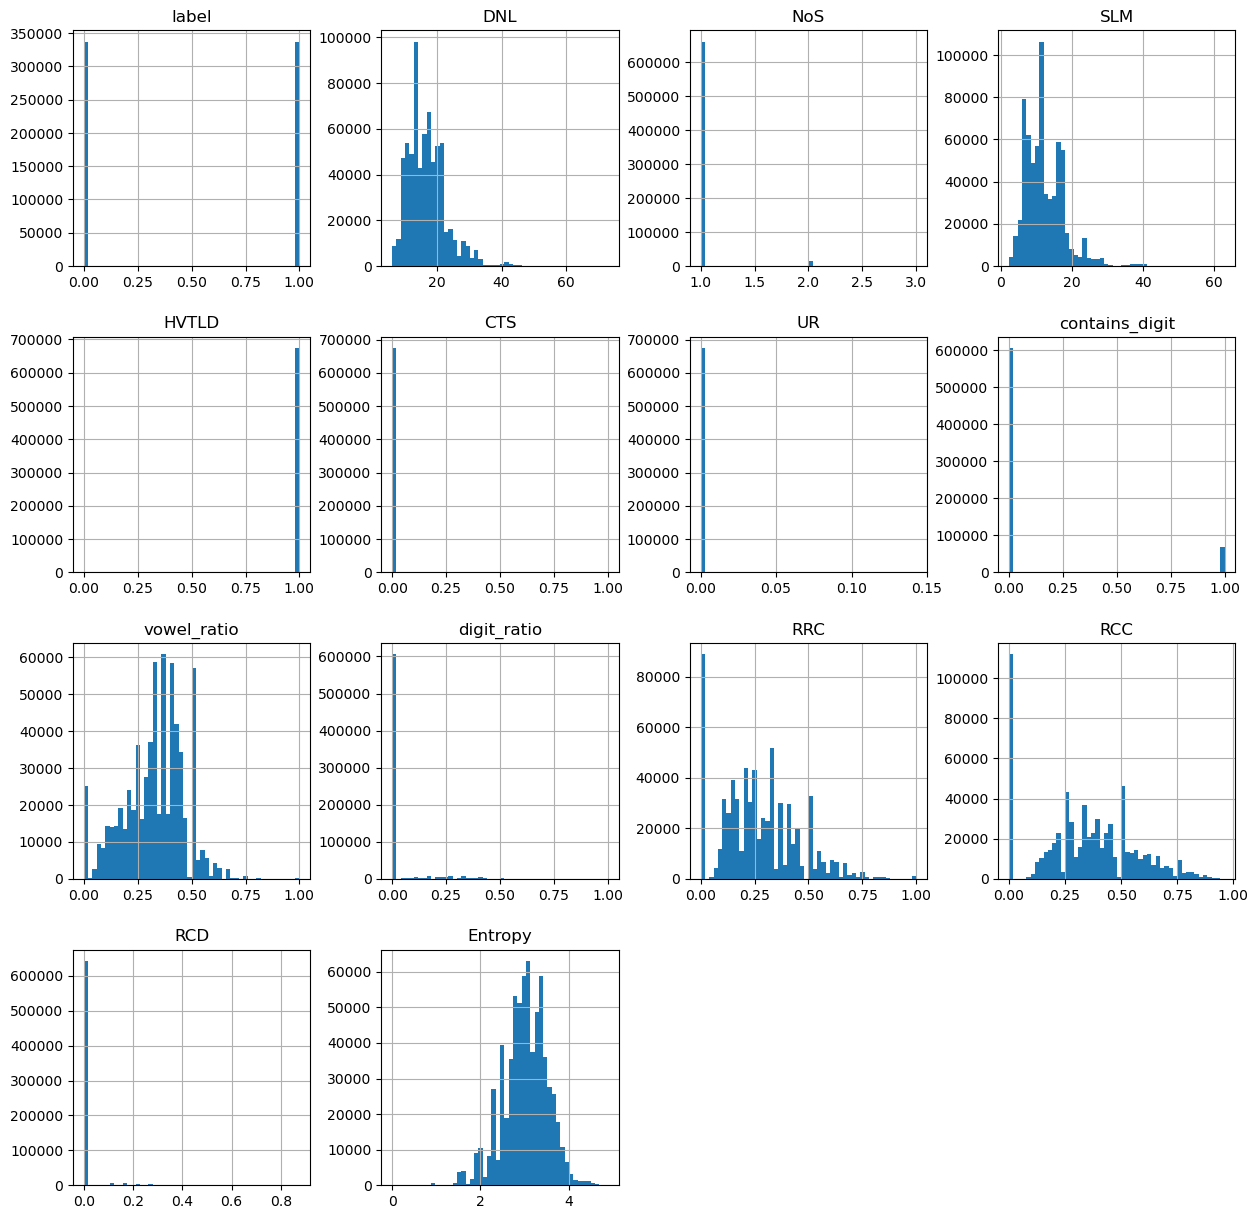

In [227]:
#Plotting the data distribution
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

# **Model Training**

Before training our models we'll split the data into train and test dataset. We'll train multiple models and choose the one which gives us the best validation-accuracy. This problem falls under "Binary classification" and some of the models we'll train are :
- Decision Tree
- Random Forest
- Multilayer Perceptron (deep learning)

### **Data Splitting**

We'll follow a 80:20 ratio for data splitting,where we use 80% of data for training and 20% for testing.

In [228]:
urldata.head()

,label,dga_type,url,DNL,NoS,SLM,HVTLD,CTS,UR,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy
0,1,gozi,mortiscontrastatim.com,22,1,18.0,1,0,0.0,0,0.333333,0.000000,0.777778,0.500000,0.000000,3.058814
1,1,corebot,cvyh1po636avyrsxebwbkn7.ddns.net,32,1,23.0,1,0,0.0,1,0.166667,0.217391,0.210526,0.608696,0.130435,4.175736
2,0,alexa,plasticbags.sa.com,18,1,11.0,1,0,0.0,0,0.272727,0.000000,0.222222,0.545455,0.000000,3.095795
3,0,alexa,mzltrack.com,12,1,8.0,1,0,0.0,0,0.125000,0.000000,0.000000,0.625000,0.000000,3.000000
4,0,alexa,miss-slim.ru,12,1,9.0,1,0,0.0,0,0.250000,0.000000,0.600000,0.444444,0.000000,2.197160


In [229]:
# remove uneccessary columns
urldata.drop(["url","dga_type"],axis=1,inplace=True)
urldata.head()

,label,DNL,NoS,SLM,HVTLD,CTS,UR,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy
0,1,22,1,18.0,1,0,0.0,0,0.333333,0.000000,0.777778,0.500000,0.000000,3.058814
1,1,32,1,23.0,1,0,0.0,1,0.166667,0.217391,0.210526,0.608696,0.130435,4.175736
2,0,18,1,11.0,1,0,0.0,0,0.272727,0.000000,0.222222,0.545455,0.000000,3.095795
3,0,12,1,8.0,1,0,0.0,0,0.125000,0.000000,0.000000,0.625000,0.000000,3.000000
4,0,12,1,9.0,1,0,0.0,0,0.250000,0.000000,0.600000,0.444444,0.000000,2.197160


In [230]:
list(urldata.columns)

['label',
 'DNL',
 'NoS',
 'SLM',
 'HVTLD',
 'CTS',
 'UR',
 'contains_digit',
 'vowel_ratio',
 'digit_ratio',
 'RRC',
 'RCC',
 'RCD',
 'Entropy']

In the data distribution plots we can see that in the 'UR', 'HVTLD', 'CTS' features we have only 1 unique values, so we won't use them.

In [231]:
#Independent Variables
x = urldata[['DNL','NoS','SLM', 'contains_digit',
 'vowel_ratio','digit_ratio','RRC',
 'RCC','RCD','Entropy']]

#Dependent Variable
y = urldata[['label']]

In [232]:
# printing x
x.head()

,DNL,NoS,SLM,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy
0,22,1,18.0,0,0.333333,0.000000,0.777778,0.500000,0.000000,3.058814
1,32,1,23.0,1,0.166667,0.217391,0.210526,0.608696,0.130435,4.175736
2,18,1,11.0,0,0.272727,0.000000,0.222222,0.545455,0.000000,3.095795
3,12,1,8.0,0,0.125000,0.000000,0.000000,0.625000,0.000000,3.000000
4,12,1,9.0,0,0.250000,0.000000,0.600000,0.444444,0.000000,2.197160


In [233]:
# printing y
y.head()

,label
0,1
1,1
2,0
3,0
4,0


In [234]:
# checking the sizes of the sample data
print("Size of x-sample :", x.shape)
print("Size of y-sample :", y.shape)

Size of x-sample : (674898, 10)
Size of y-sample : (674898, 1)


In [235]:
# DATA SPLITTING 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (539918, 10)
Shape of x_valid:  (134980, 10)
Shape of y_train:  (539918, 1)
Shape of y_valid:  (134980, 1)


## **1] Decision Tree**

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [236]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(max_depth=7)

# start training the model
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [237]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = DecisionTree.predict(x_train)
y_pred_test = DecisionTree.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.754
Accuracy on Testing dataset :  0.754


In [238]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       0.93      0.69      0.79     91170
   malicious       0.58      0.89      0.70     43810

    accuracy                           0.75    134980
   macro avg       0.75      0.79      0.75    134980
weighted avg       0.82      0.75      0.76    134980



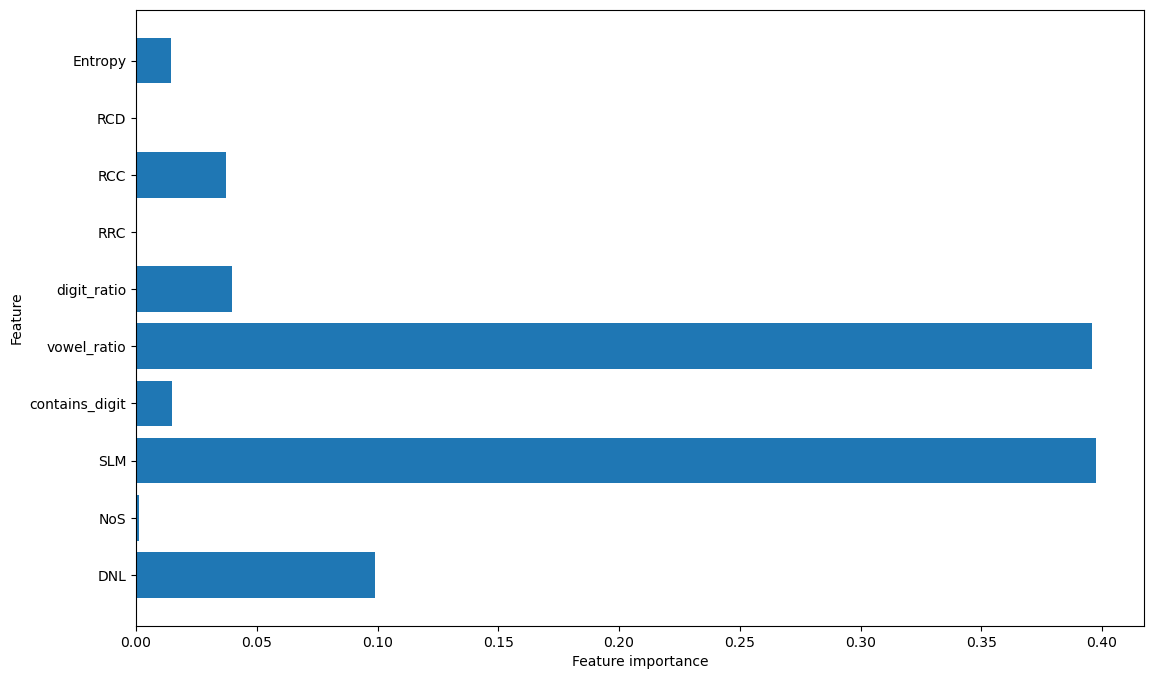

In [239]:

feature_names = ['DNL','NoS','SLM', 'contains_digit',
 'vowel_ratio','digit_ratio','RRC',
 'RCC','RCD','Entropy']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), DecisionTree.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **2] Random Forest**
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [240]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(max_depth=7)

# start training the model
RandomForest.fit(x_train,y_train)

C:\Users\ilan1\AppData\Local\Temp\ipykernel_20316\1949757544.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(x_train,y_train)


RandomForestClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [241]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = RandomForest.predict(x_train)
y_pred_test = RandomForest.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.76
Accuracy on Testing dataset :  0.759


In [242]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       0.90      0.70      0.79     87067
   malicious       0.61      0.86      0.72     47913

    accuracy                           0.76    134980
   macro avg       0.76      0.78      0.75    134980
weighted avg       0.80      0.76      0.76    134980



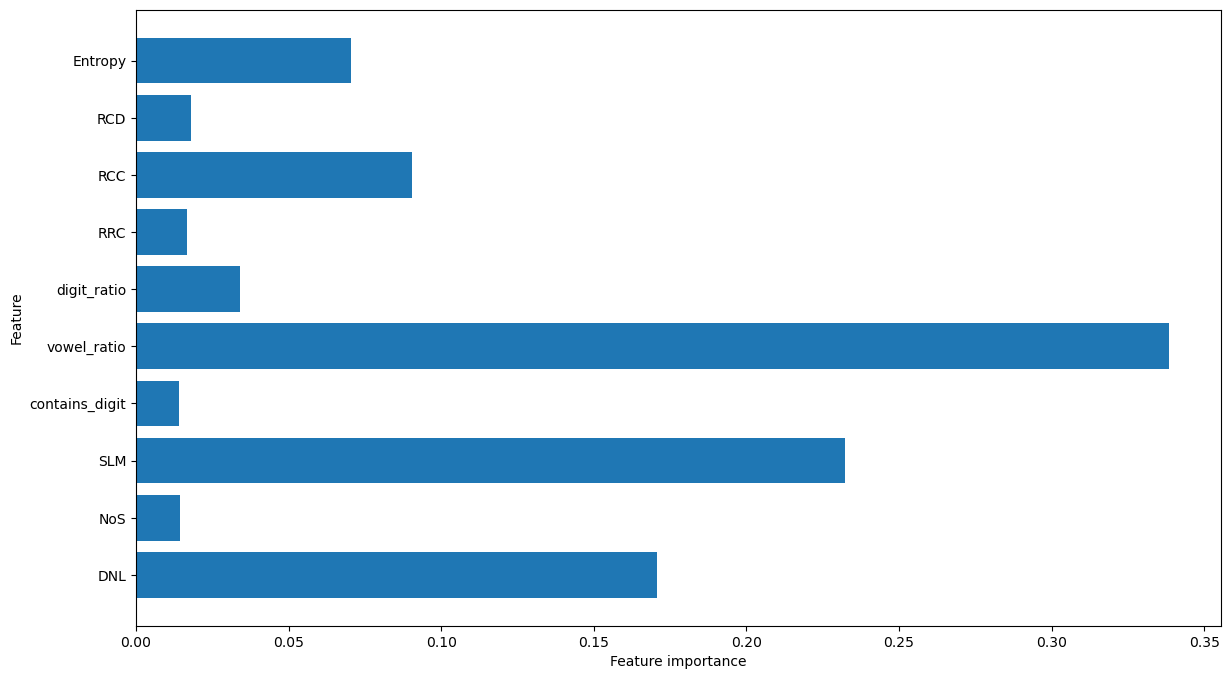

In [243]:
feature_names = ['DNL','NoS','SLM', 'contains_digit',
 'vowel_ratio','digit_ratio','RRC',
 'RCC','RCD','Entropy']

#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), RandomForest.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **3] Gradient Boosting**

Gradient Boosting Classifier is a decision tree-based machine learning algorithm that uses gradient boosting to iteratively train a series of trees to minimize a loss function. It is a powerful algorithm that can achieve high accuracy in classification tasks, but requires careful hyperparameter tuning and regularization to avoid overfitting.

In [244]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier object
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7)

# Train the model
gbc.fit(x_train,y_train)

C:\Users\ilan1\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [245]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = gbc.predict(x_train)
y_pred_test = gbc.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.827
Accuracy on Testing dataset :  0.825


In [246]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       0.90      0.78      0.84     77398
   malicious       0.75      0.88      0.81     57582

    accuracy                           0.83    134980
   macro avg       0.83      0.83      0.82    134980
weighted avg       0.84      0.83      0.83    134980



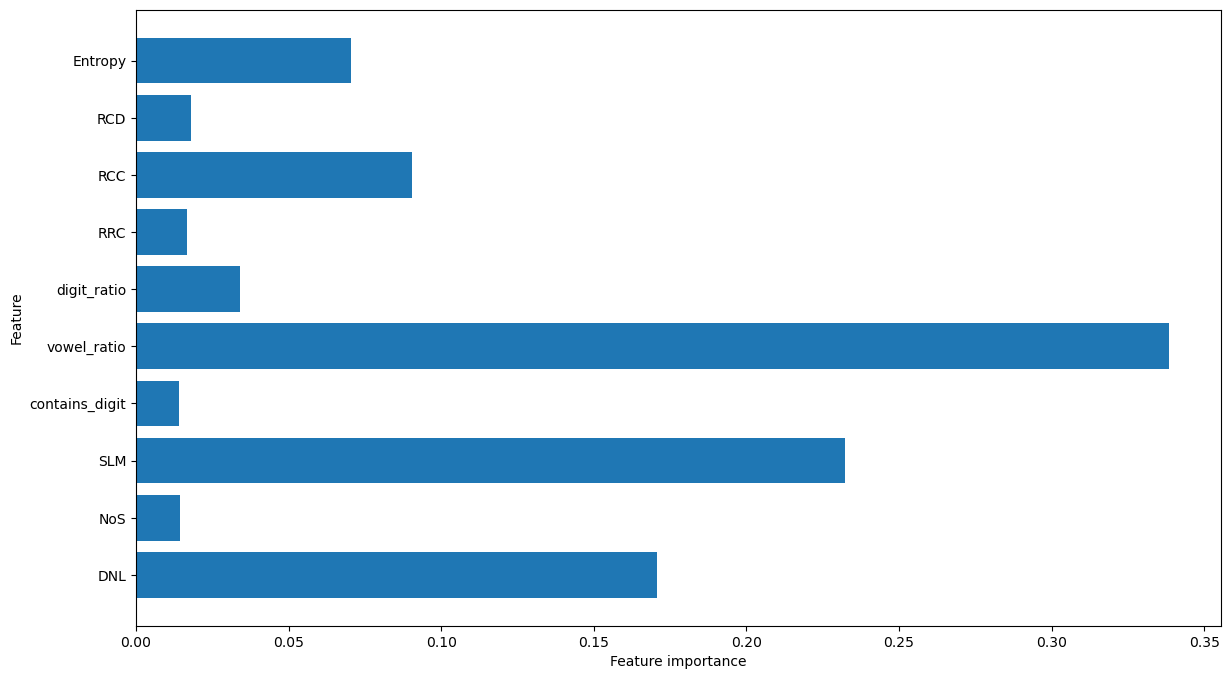

In [247]:
feature_names = ['DNL','NoS','SLM', 'contains_digit',
 'vowel_ratio','digit_ratio','RRC',
 'RCC','RCD','Entropy']

#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), RandomForest.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **4] Multilayer Perceptron (Deep Learning)**
A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [248]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [249]:
# print input shape
x_train.shape

(539918, 10)

In [250]:
# model building
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (10, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                352       
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [251]:
# compiling model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [252]:
# custom callback to stop the training when certain metric value is reached

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
         if(logs.get('val_loss')<0.1):
                print("val_loss < 0.1)")
#             print("\nReached 0.1 val_loss so cancelling training!")
#             self.model.stop_training = True
        
callback = myCallback()


In [253]:
# start training the model 
history = model.fit(x_train, y_train, epochs=15,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/15
2110/2110 [==============================] - 7s 2ms/step - loss: 0.5752 - acc: 0.6950 - val_loss: 0.5356 - val_acc: 0.7356
Epoch 2/15
2110/2110 [==============================] - 3s 1ms/step - loss: 0.5221 - acc: 0.7305 - val_loss: 0.5533 - val_acc: 0.7230
Epoch 3/15
2110/2110 [==============================] - 3s 1ms/step - loss: 0.5119 - acc: 0.7363 - val_loss: 0.5076 - val_acc: 0.7426
Epoch 4/15
2110/2110 [==============================] - 3s 1ms/step - loss: 0.5076 - acc: 0.7386 - val_loss: 0.5058 - val_acc: 0.7325
Epoch 5/15
2110/2110 [==============================] - 3s 1ms/step - loss: 0.5046 - acc: 0.7382 - val_loss: 0.5088 - val_acc: 0.7272
Epoch 6/15
2110/2110 [==============================] - 3s 1ms/step - loss: 0.5028 - acc: 0.7382 - val_loss: 0.4987 - val_acc: 0.7361
Epoch 7/15
2110/2110 [==============================] - 3s 1ms/step - loss: 0.4988 - acc: 0.7396 - val_loss: 0.4986 - val_acc: 0.7374
Epoch 8/15
2110/2110 [==============================] - 3s 1ms

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


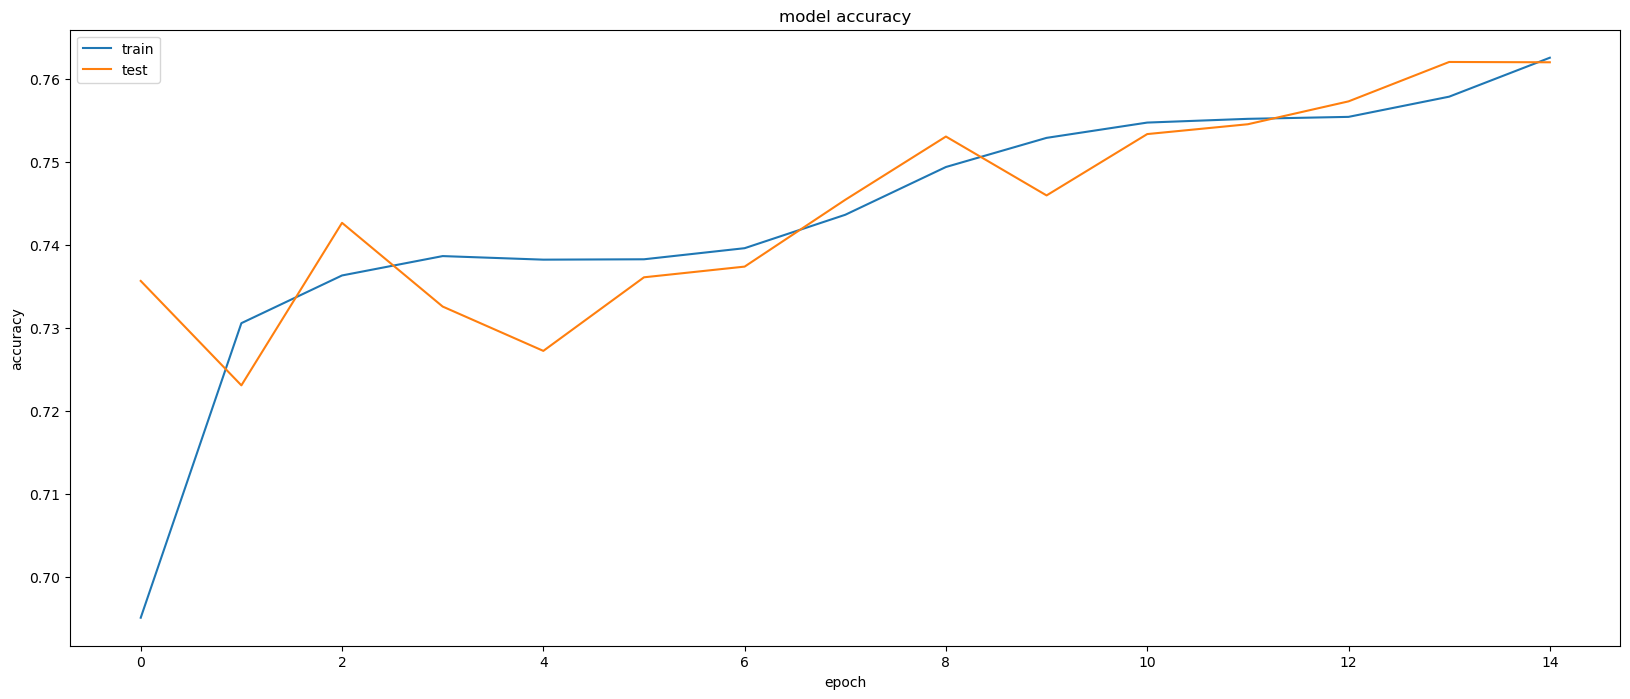

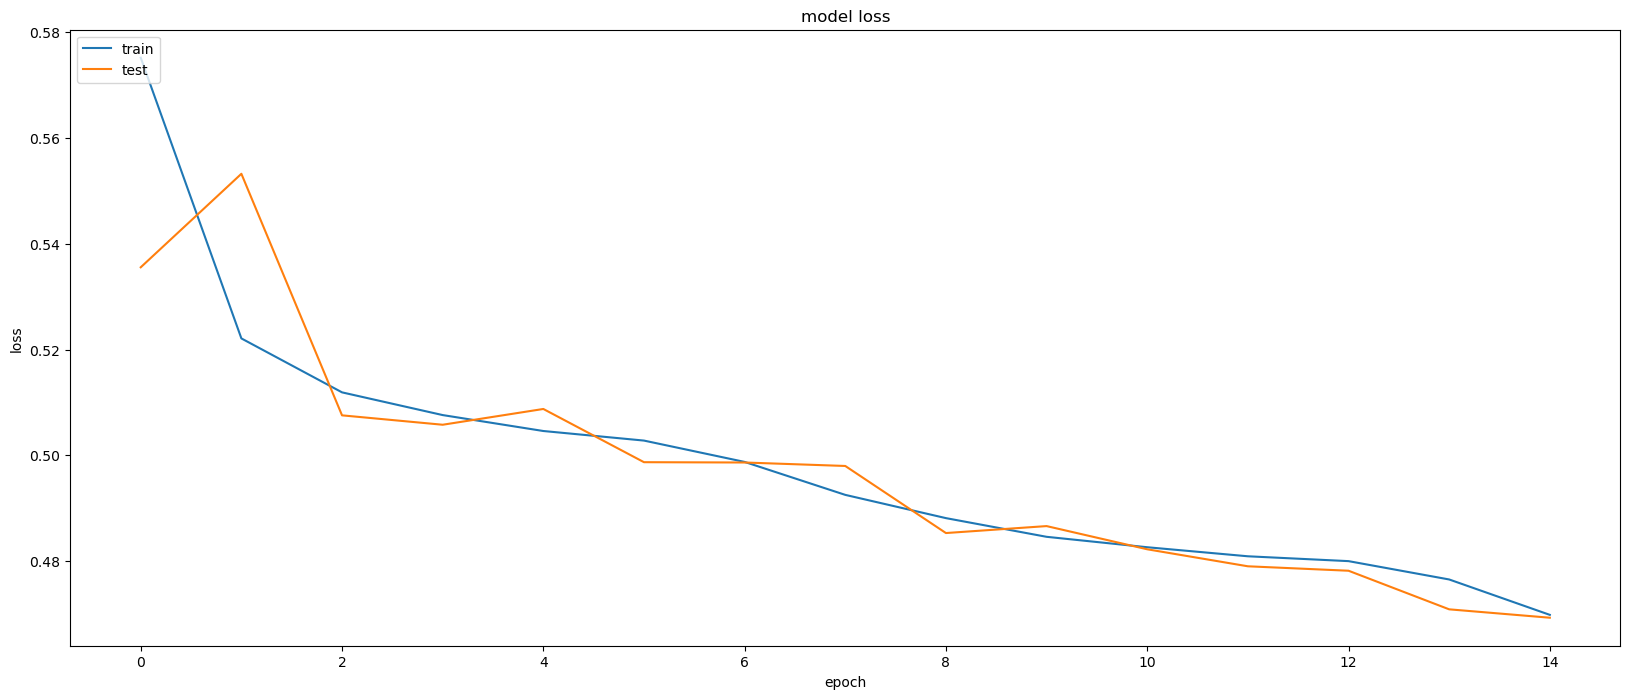

In [254]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [255]:
# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

4219/4219 [==============================] - 4s 940us/step - loss: 0.4693 - acc: 0.7620
Test loss: 0.4692922532558441
Test Accuracy: 0.7619795799255371


In [256]:
# predicting on test data.
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])

4219/4219 [==============================] - 4s 865us/step
PREDICTED : 
Non Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Mallicious
Non Mallicious
Mallicious
Non Mallicious


ACTUAL : 
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Non Mallicious


### **Saving the prediction model**

In [257]:
# Save Model Weights and Architecture Together
# The Gradient boosting classifier had the best results so we will save it's model
import joblib
model1 = open("E:\\University\\Year 3\\Methods for detecting cyber attacks\\Project\\gbc_DGA.pkl","wb")
joblib.dump(gbc, model1)
model1.close()

In [258]:
# MLP model save if needed
model.save("DGA_MLP.h5")